In [44]:
import pandas as pd
df = pd.read_csv('c:/data/project2/df_merge.csv', encoding='ANSI', index_col=0)
df.columns

Index(['개업점포수', '폐업점포수', '총상주인구수', '남성상주인구수', '여성상주인구수', '연령대10상주인구수',
       '연령대20상주인구수', '연령대30상주인구수', '연령대40상주인구수', '연령대50상주인구수', '연령대60이상상주인구수',
       '총가구수', '아파트가구수', '비아파트가구수', '아파트평균시가', '점포수', '유사업종점포수', '개업율', '폐업률',
       '프랜차이즈점포수', '총직장인구수', '남성직장인구수', '여성직장인구수', '연령대10직장인구수', '연령대20직장인구수',
       '연령대30직장인구수', '연령대40직장인구수', '연령대50직장인구수', '연령대60이상직장인구수', '관공서수', '은행수',
       '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '총유동인구수',
       '남성유동인구수', '여성유동인구수', '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수',
       '연령대40유동인구수', '연령대50유동인구수', '연령대60이상유동인구수', '월매출평균', 'cluster'],
      dtype='object')

In [45]:
print(len(df[df['cluster']==0]))
print(len(df[df['cluster']==1]))
print(len(df[df['cluster']==2]))

938
216
23


In [46]:
cluster0 = df[df['cluster']==0]

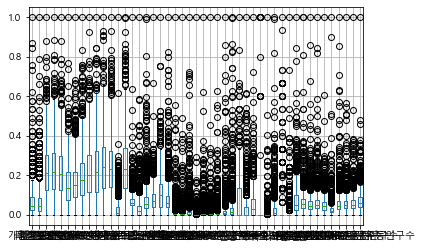

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() # 표준화 : 평균0, 표준편차 1
df_scaled=pd.DataFrame(scaler.fit_transform(df.iloc[:,:-2]), columns=df.columns[:-2], index=df.index)
# df_scaled.boxplot()

In [48]:
# cols1=['개업점포수','비아파트가구수', '아파트평균시가', '개업율', '총직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '총유동인구수']
# cols1 = ['상권코드', '개업점포수', '폐업점포수', '총상주인구수', '연령대20상주인구수', '연령대30상주인구수',
#      '비아파트가구수', '아파트평균시가', '점포수', '개업율', '폐업률',
#      '총직장인구수', '연령대20직장인구수', '연령대30직장인구수', '관공서수', '은행수', '약국수',
#        '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '총유동인구수', '연령대20유동인구수',
#        '연령대30유동인구수']

In [50]:
import statsmodels.api as sm 
X=df_scaled
y=df['월매출평균']
model=sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  월매출평균   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     7.970
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           8.01e-39
Time:                        17:29:11   Log-Likelihood:                -23266.
No. Observations:                1177   AIC:                         4.661e+04
Df Residuals:                    1136   BIC:                         4.682e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
개업점포수        -2.552e+07   1.09e+08     -0.234   

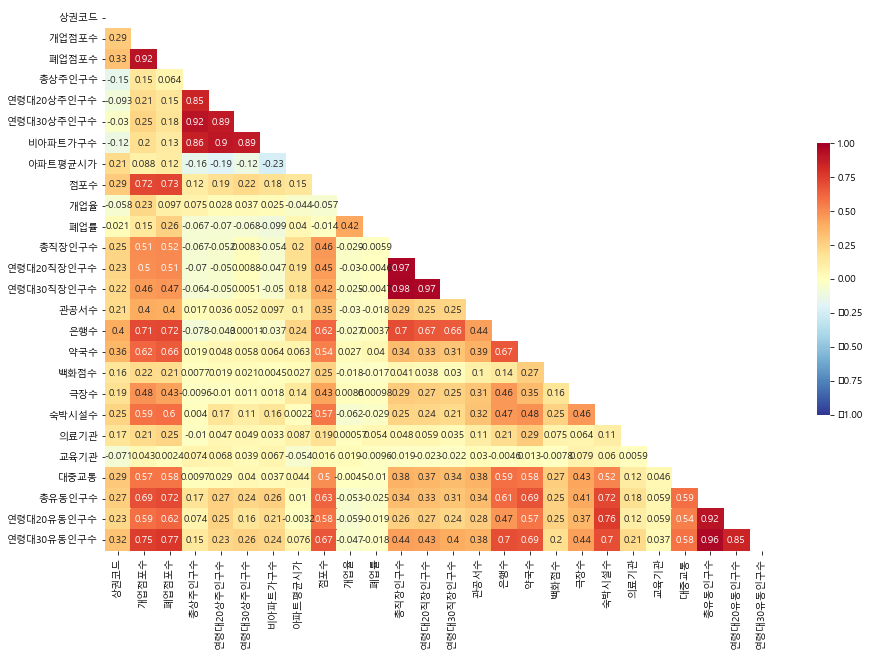

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,10)) #그래프의 사이즈
mask = np.zeros_like(df_scaled[cols1].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_scaled[cols1].corr(), annot=True, mask=mask, cbar_kws={'shrink':.5}, cmap='RdYlBu_r', vmin =-1, vmax=1)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
25,82.025917,총유동인구수
24,56.587282,연령대30유동인구수
23,50.969209,총직장인구수
22,46.715884,연령대30상주인구수
21,44.302553,총상주인구수
20,36.801959,연령대30직장인구수
19,30.693027,연령대20상주인구수
18,29.102644,비아파트가구수
17,25.879723,연령대20직장인구수
16,20.507199,개업점포수


In [17]:
cluster1 = df[df['cluster']==1]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() # 표준화 : 평균0, 표준편차 1
df_scaled=pd.DataFrame(scaler.fit_transform(cluster1.iloc[:,:-2]), columns=cluster1.columns[:-2], index=cluster1.index)

In [19]:
cols2=['개업점포수', '총상주인구수','아파트평균시가', '개업율', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '연령대20유동인구수']

In [20]:
X=df_scaled[cols2]
y=cluster1['월매출평균']
model=sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  월매출평균   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              70.07
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                    1.74e-69
Time:                        17:24:49   Log-Likelihood:                         -4260.7
No. Observations:                 216   AIC:                                      8549.
Df Residuals:                     202   BIC:                                      8597.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
13,3.546742,개업점포수
12,3.094589,총상주인구수
11,3.077277,개업율
10,2.660882,아파트평균시가
9,2.371490,연령대20유동인구수
8,2.272102,약국수
7,2.208232,연령대30직장인구수
6,2.193178,은행수
5,1.970888,대중교통
4,1.698358,숙박시설수


In [22]:
cols1=['개업점포수','비아파트가구수', '아파트평균시가', '개업율', '총직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '총유동인구수', '월매출평균']

cols2=['개업점포수', '연령대10상주인구수','아파트평균시가', '개업율', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '연령대20유동인구수', '월매출평균']
cluster0[cols1].to_csv('c:/data/project2/df_filtered1.csv', encoding='ANSI')
cluster1[cols2].to_csv('c:/data/project2/df_filtered2.csv', encoding='ANSI')

KeyError: "['연령대10상주인구수'] not in index"